In [281]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

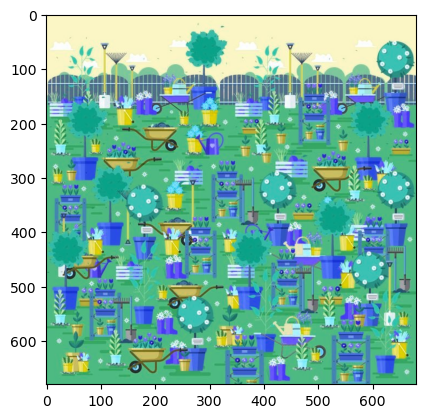

In [282]:
image = cv2.imread(r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Counting\pair_boot.jpg")
plt.imshow(image)

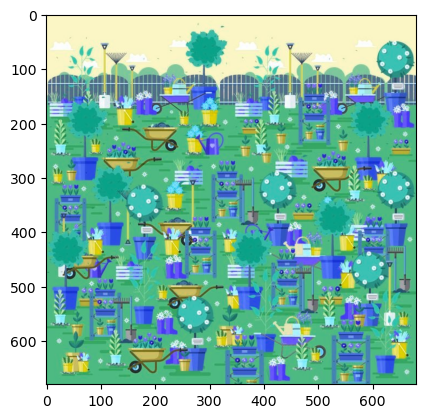

In [283]:
output_image = image.copy()
plt.imshow(output_image)

In [284]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [285]:
template = cv2.imread(r'C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Counting\pair_boot\flower.png')

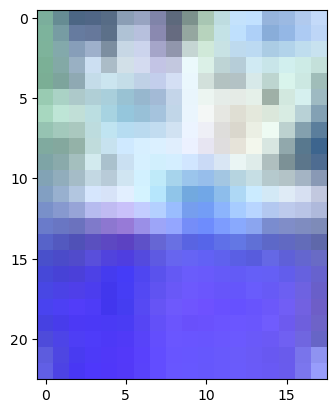

In [286]:
flipped_template = cv2.flip(template, 1)

plt.imshow(flipped_template)

In [287]:
threshold = 0.75

w, h = template.shape[:2]

result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
loc = np.where(result >= threshold)

rectangles = []
for pt in zip(*loc[::-1]):
    rectangles.append([int(pt[0]), int(pt[1]), int(w), int(h)])

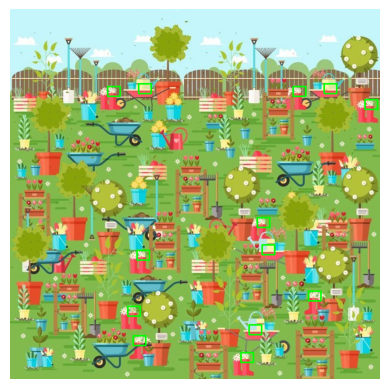

In [288]:
w_flip, h_flip = flipped_template.shape[:2]

result = cv2.matchTemplate(image, flipped_template, cv2.TM_CCOEFF_NORMED)
threshold2 = 0.715  # You can adjust the threshold for better accuracy
loc = np.where(result >= threshold2)

for pt in zip(*loc[::-1]):
    rectangles.append([int(pt[0]), int(pt[1]), int(w_flip), int(h_flip)])

rectangles, _ = cv2.groupRectangles(rectangles, groupThreshold=1, eps=0.5)

for (x, y, w, h) in rectangles:
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [289]:
len(rectangles)

13